# Retail Giant Sales Forecasting

__Problem Statement:__ Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office. As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

__Business Objective:__ 
1. Find best market segment amongst 21 segments in terms of profitability
2. Determine which forecasting technic best fits the time-series data for higher accurate forecasts/predictions.


### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Step-1: Data Preparation & Pre-Processing

In [2]:
df = pd.read_csv('Global+Superstore+Data.csv')

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


### DataType Conversion

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')

In [6]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


### Creating New column 'Market Segment'

In [7]:
df['Market_Segment'] = df['Market']+'_'+df['Segment']
df.head() 

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa_Consumer


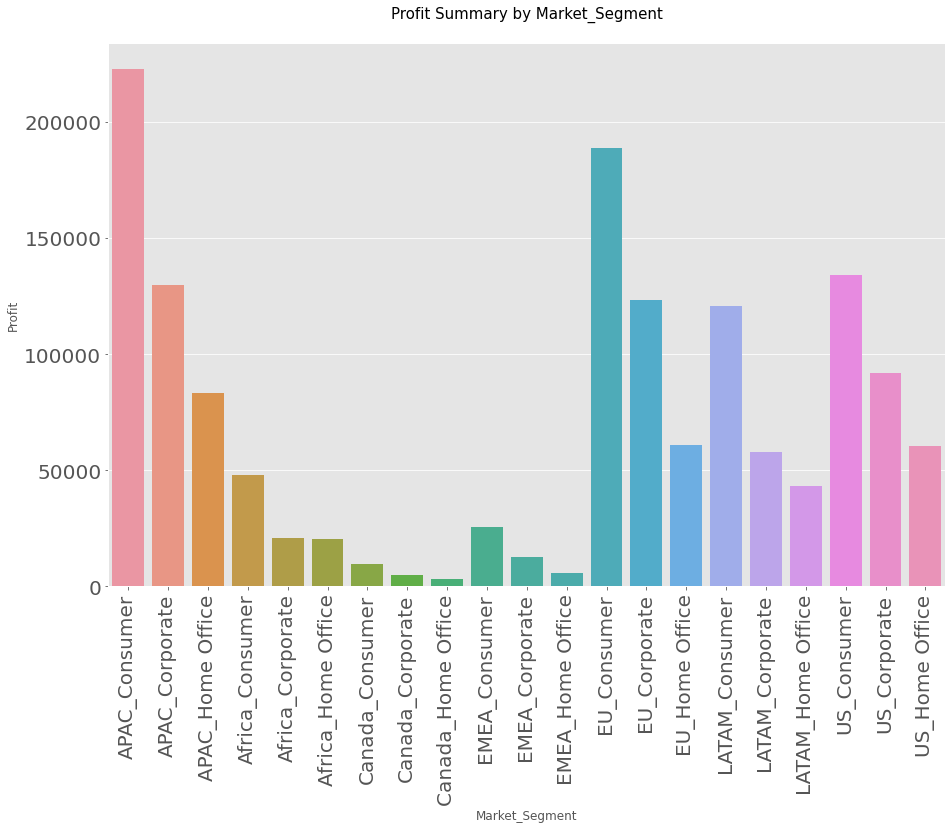

In [8]:
# Since now we have Market_Segment ready, let's view how the sales/profit look for each segment

plt.figure(figsize=[15,10])
profit=df.groupby('Market_Segment').agg({'Profit':'sum'})
sns.barplot(profit.index, profit['Profit'])
plt.title('Profit Summary by Market_Segment\n', fontdict={'size':15})
plt.xticks(rotation=90, size=20)
plt.yticks(size=20)
plt.show()

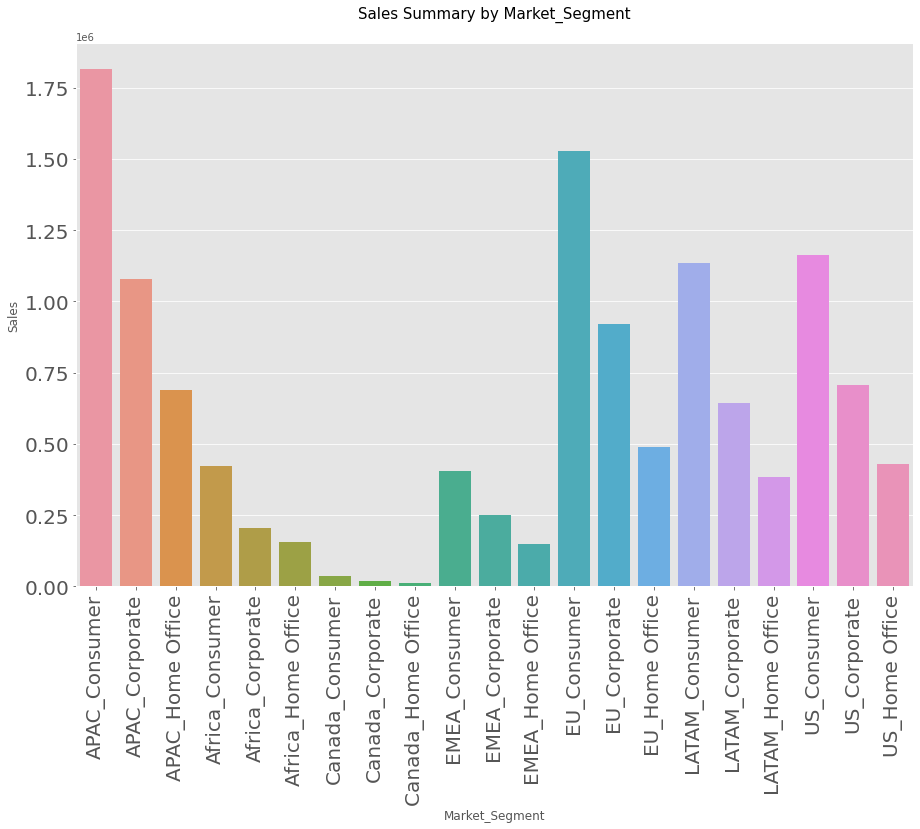

In [9]:
# Sales
plt.figure(figsize=[15,10])
sales=df.groupby('Market_Segment').agg({'Sales':'sum'})
sns.barplot(sales.index, sales['Sales'])
plt.title('Sales Summary by Market_Segment\n', fontdict={'size':15})
plt.xticks(rotation=90, size=20)
plt.yticks(size=20)
plt.show()

#### From the above we can infer that Sales & Profit are highest in 'APAC_Consumer' Market Segment

### Creating Pivot tables to summarize Profits by segment

In [10]:
dfpt=df.pivot_table(index='Order Date', columns='Market_Segment', values='Profit')

dfpt.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,30.466078,-8.686320,20.933236,5.900867,24.763143,43.501667,49.703333,6.285,NaN,-64.186826,...,24.532875,34.767185,22.740203,87.398897,12.867693,25.526481,-2.659744,32.445221,19.496027,58.758710
2011-02,64.275738,70.603482,19.920668,-4.295489,-6.337800,68.800500,13.215000,9.240,21.9975,25.786667,...,40.896667,-15.679890,57.292462,16.225500,32.312267,40.701510,-16.218382,41.190091,14.549159,50.358791
2011-03,23.855428,71.273265,25.638150,26.259257,22.221545,13.905000,27.490000,NaN,42.0150,16.427442,...,-3.114000,20.217619,71.180516,14.197105,41.851657,7.768000,48.117750,2.294390,2.712119,-8.404106
2011-04,14.080940,3.361189,24.153912,10.592083,47.087550,20.880900,9.180000,6.510,NaN,3.193500,...,-28.531875,48.852566,23.930415,7.242833,19.279288,39.665485,-15.835129,25.173046,13.371122,113.476492
2011-05,54.069718,21.881891,12.753937,-1.817318,30.665625,13.060000,0.435000,NaN,NaN,5.751800,...,-8.397750,15.295636,78.139091,34.100769,28.216000,4.087046,-24.872250,10.691581,50.220648,8.575182


In [11]:
dfpt.shape

(48, 21)

### Train-Test Split

In [12]:
train_len=42
train = dfpt[:train_len]
test = dfpt[train_len:]

### Computing CoV : Coefficient of Variance

The coefficient of variation (CV) is the ratio of the standard deviation to the mean. The higher the coefficient of variation, the greater the level of dispersion around the mean. It is generally expressed as a percentage

In [13]:
cov = pd.DataFrame(columns=['Segment', 'CoV'])

In [14]:
for i in dfpt.columns:
    var={'Segment':i, 'CoV': np.std(train[i])/np.mean(train[i])}
    cov = cov.append(var, ignore_index=True)    

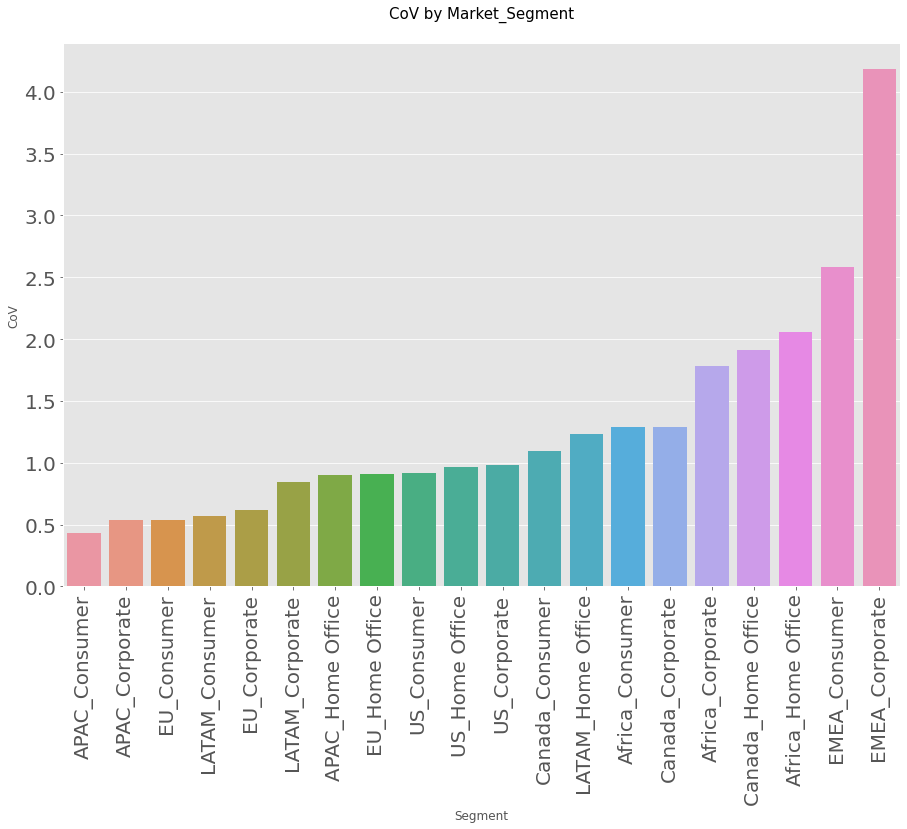

In [15]:
cov = cov.sort_values(by='CoV')

plt.figure(figsize=[15,10])
sns.barplot(cov.Segment[1:], cov.CoV)
plt.title('CoV by Market_Segment\n', fontdict={'size':15})
plt.xticks(rotation=90, size=20)
plt.yticks(size=20)
plt.show()

__The reason to use CoV here is that it helps us in determining the variation or dispersion in profits of each segment, this way we can identify which segment is more volatile and which one is much stable and better the chances of predicting sales, higher the CoV higher instability. Based on above we could infer that 'APAC_Consumer' is having much better CoV score with least variability__

### Creating DataFrame for APAC_Consumer

In [16]:
df_final = df[df['Market_Segment'] == 'APAC_Consumer']
df_final = df_final.set_index('Order Date')
df_final.head()

,Segment,Market,Sales,Profit,Market_Segment
Order Date,,,,,
2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
2011-07,Consumer,APAC,1822.080,564.840,APAC_Consumer
2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [17]:
# Let's drop all unwanted columns like Market, Segment, Market_Segment

df_final = df_final[['Sales']]
df_final.head()

,Sales
Order Date,
2013-10,5175.171
2011-07,1822.080
2012-04,5244.840
2013-06,3701.520
2012-02,1878.720


In [18]:
df_final = df_final.groupby('Order Date').sum()
df_final

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000
2011-06,30398.9316
2011-07,22431.5949
2011-08,20331.0735
2011-09,24860.3949


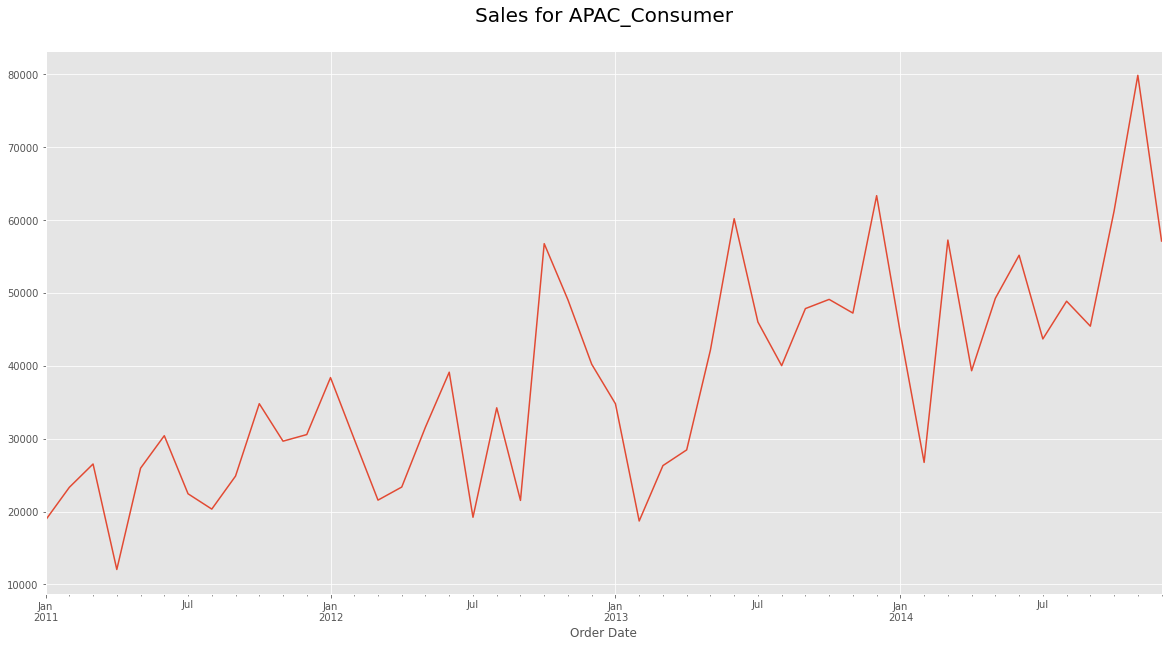

In [19]:
df_final['Sales'].plot(figsize=[20,10])
plt.title('Sales for APAC_Consumer\n', fontdict={'size':20})
plt.show()

### Checking Decomposition of Sales to look for Trend/Seasonality

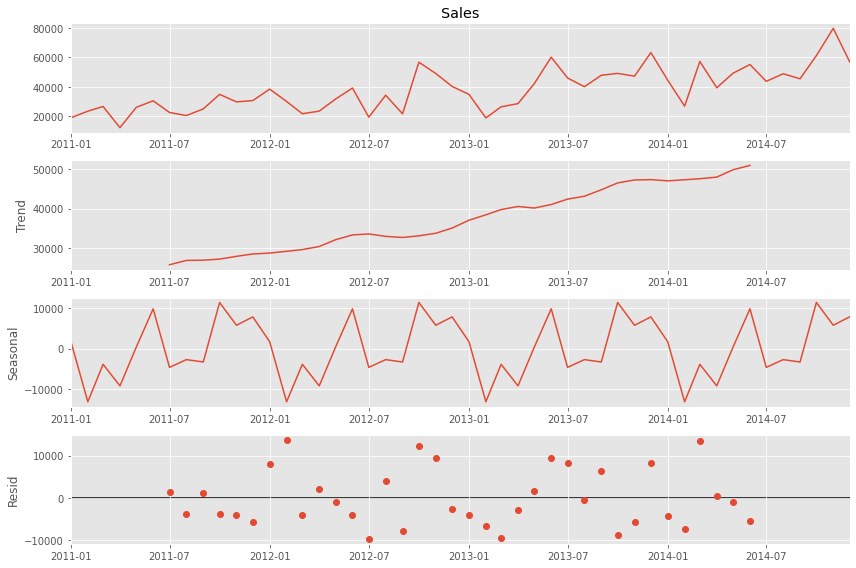

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose

# Missing values imputation as Interpolation
df_final.Sales.interpolate(inplace=True)

#converting the Order Date column back to date-time format
df_final.Sales.index = df_final.Sales.index.to_timestamp()

#decomposition
decomposition = seasonal_decompose(df_final.Sales)
fig = decomposition.plot()
plt.show()

From the above decomposition plots we can infer that there is a uptrend existing , there is also certain level of seasonality existing, Thus indicating that Holt winter's method and ARIMA method might yield better results comparatively

In [21]:
df_final = df_final.to_timestamp()
df_final

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


In [22]:
# train test split for final dataframe

train = df_final[:train_len]
test = df_final[train_len:]

In [23]:
train.shape # 42 months

(42, 1)

In [24]:
test.shape # 6 months

(6, 1)

## Step-2: Model Building for Forecasting

### 1) NAIVE Method

In [25]:
y_hat_naive = test.copy()
y_hat_naive['Naive_Forecast'] = train['Sales'][train_len-1]

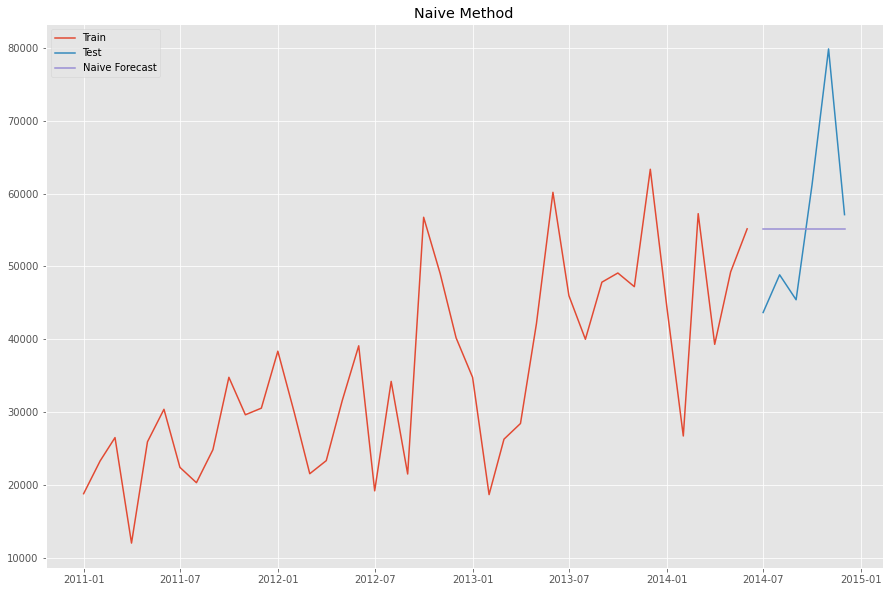

In [26]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['Naive_Forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [27]:
#Computing RMSE & MAPE Scores
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['Naive_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['Naive_Forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive Forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47


### 2) Simple Average Method

In [28]:
y_hat_sa = test.copy()
y_hat_sa['Simple_Average_Forecast'] = train['Sales'].mean()

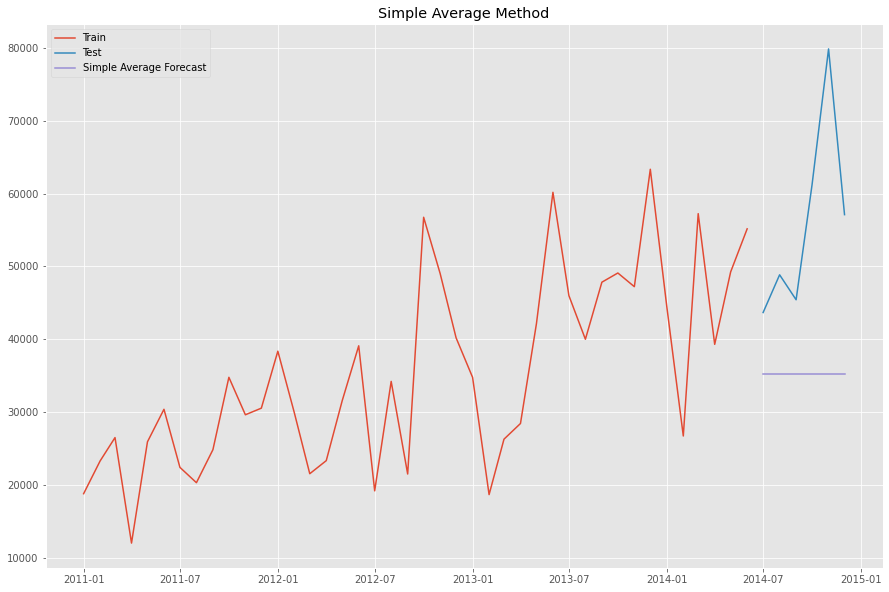

In [29]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sa['Simple_Average_Forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [30]:
#Computing RMSE & MAPE Scores
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sa['Simple_Average_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sa['Simple_Average_Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34


### 3) Simple Moving Average Method

In [31]:
y_hat_sma = df_final.copy()
ma_window = 2
y_hat_sma['sma_forecast'] = df_final['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1] 

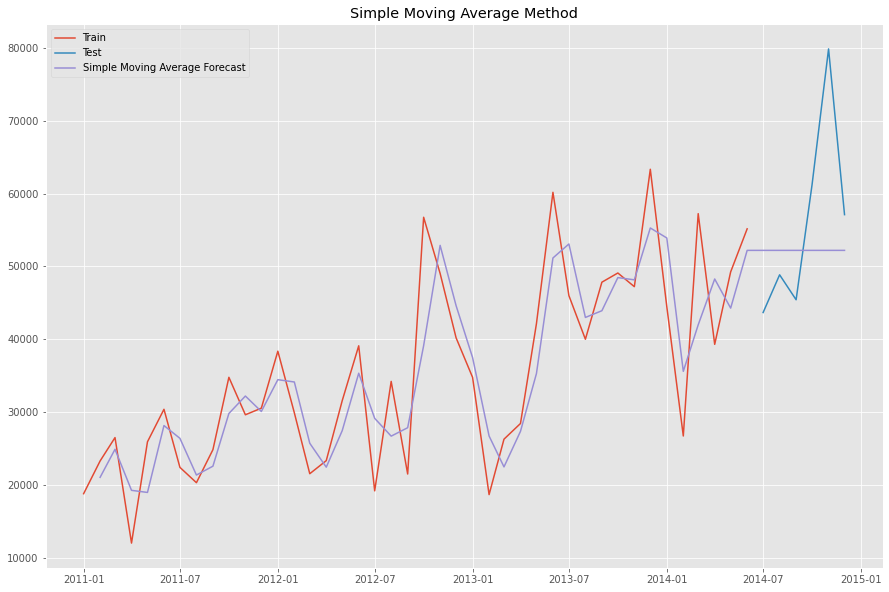

In [32]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [33]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54


### 4) Simple Exponential Smoothing

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.24674418604651163, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


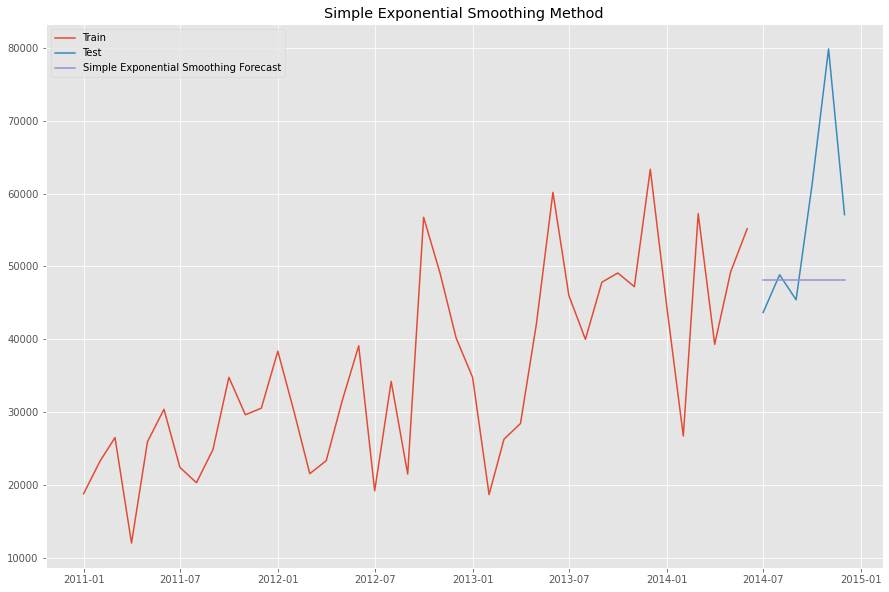

In [35]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [36]:
#Computing RMSE & MAPE Scores
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74


### 5) Holt's Method with Trend

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05214285714285714, 'smoothing_trend': 0.05214285714285714, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18638.663519999995, 'initial_trend': 964.8086345454556, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


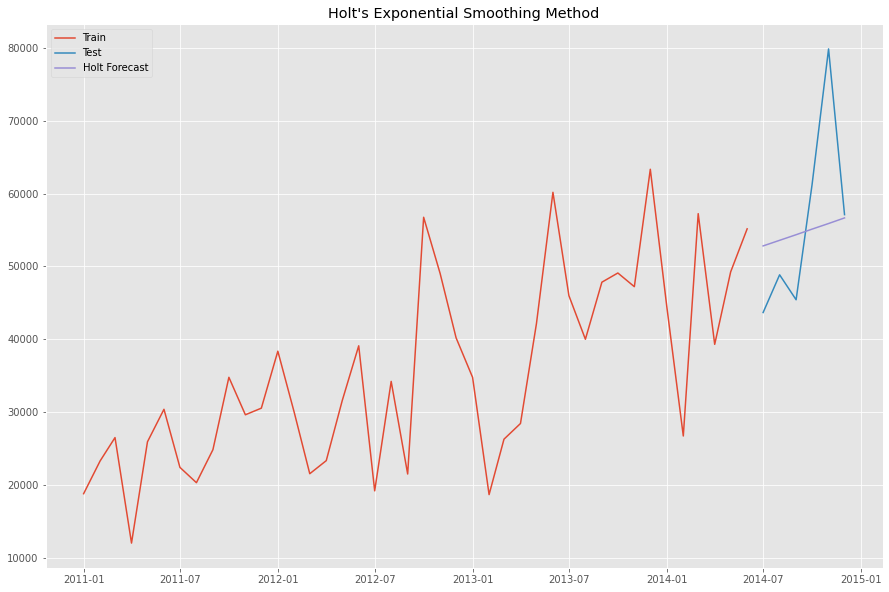

In [38]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt Forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [39]:
#Computing RMSE & MAPE Scores
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17


### 6) Holt's Method with Trend & Seasonality

In [40]:
# Assuming Additive Trend & Additive Seasonality
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([  3952.88057396,  -9211.53080729, -10479.58736354,  -9282.54725729,
         1016.15604896,  12737.03211146,  -8578.55198854,  -2357.83653854,
        -6344.09922604,  15891.83603021,   8787.51308021,   3868.73533646]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


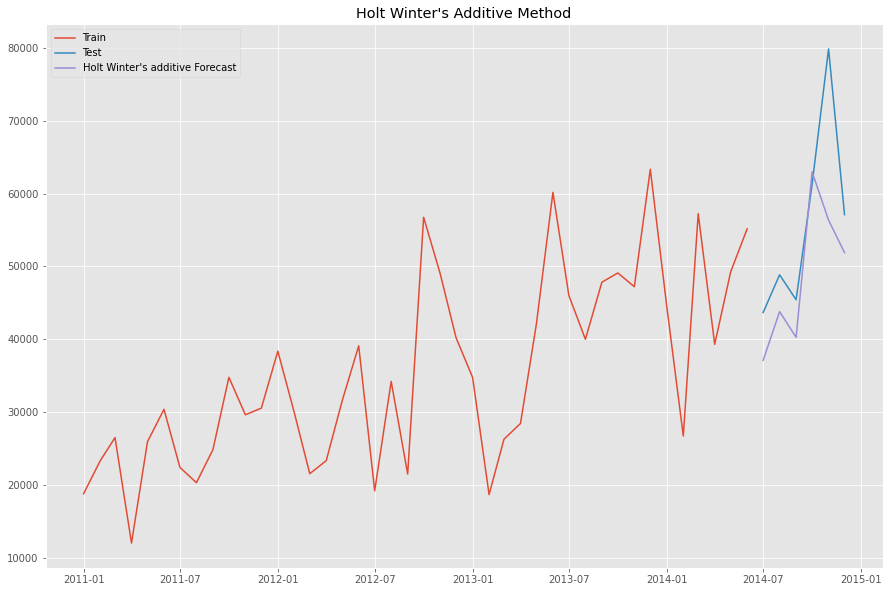

In [41]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winter\'s additive Forecast')
plt.legend(loc='best')
plt.title('Holt Winter\'s Additive Method')
plt.show()

In [42]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winter\'s Additive Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02


In [43]:
# Assuming Additive Trend & Multiplicative Seasonality
model = ExponentialSmoothing(np.asarray(train['Sales']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hw_forecast_2'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([1.14330212, 0.76036851, 0.69869713, 0.73937527, 1.02255778,
       1.32751953, 0.72524578, 0.90263868, 0.79512941, 1.50506931,
       1.26466724, 1.11542925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


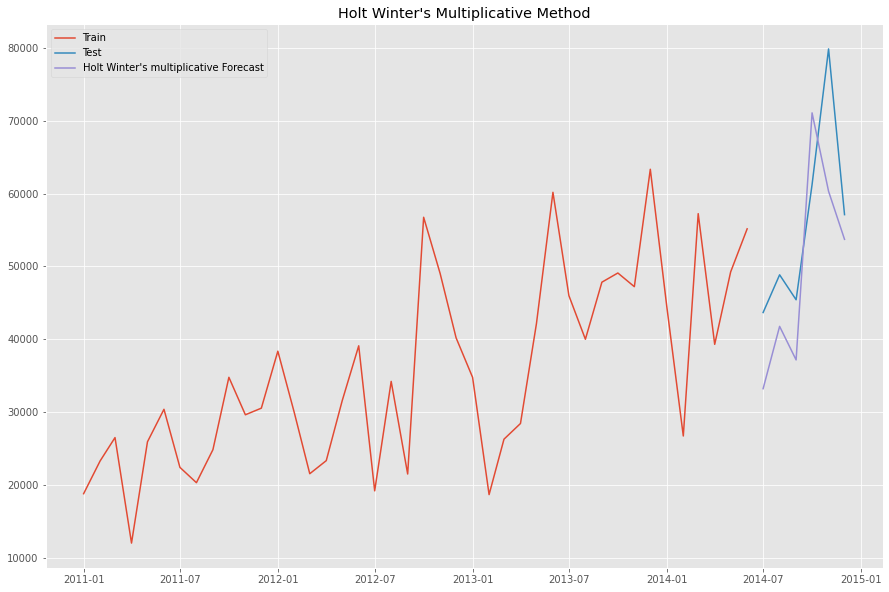

In [44]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast_2'], label='Holt Winter\'s multiplicative Forecast')
plt.legend(loc='best')
plt.title('Holt Winter\'s Multiplicative Method')
plt.show()

In [45]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_hwa['hw_forecast_2'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast_2'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winter\'s Multiplicative Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17


__From all the above methods, right from NAIVE method upto Advanced Smoothing methods like Holt & Holt winter's method we can infer that Holt Winter's method(additive) is said to perform much better interms of forecasting sales with accuracy of approximately 87%, although additive method is predicting more accurately the multiplicative method is able to capture the seasonal peaks much accurately.__

## Regression Models

For a creating Regression models we need the data to fulfill 2 major assumptions, the data should be stationery and should have some sort of auto-correlation, let's check whether the data is stationery or not

### Stationery Tests:

#### Kwiatkowski-Phillips-Schmidt-Shin test (KPSS) 

In [46]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_final['Sales'])

print('KPSS Statistic: %f' %kpss_test[0])
print('Critical values @ 0.05:%.2f' %kpss_test[3]['5%'])
print('P-Value: %f' %kpss_test[1])

KPSS Statistic: 1.103752
Critical values @ 0.05:0.46
P-Value: 0.010000


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:2011: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


__The P-Value is not > 0.05 thus we reject the Null Hypothesis(Data is stationery) of KPSS Test.__ 

####  Augmented Dickey-Fuller (ADF) test

In [47]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_final['Sales'])

print('ADF Statistic:', adf_test[0])
print('Critical Value @ 0.05:',  adf_test[4]['5%'])
print('P-Value:', adf_test[1] )


ADF Statistic: -3.3760244736258023
Critical Value @ 0.05: -2.925338105429433
P-Value: 0.011803859657119784


__The P-Value is > 0.05 thus we reject the Null Hypothesis(Data is stationery) of ADF Test.__

__Based on the above Stationery tests we can determine that the data is not stationery, to create Auto regressive models we need to make the data stationery, meaning: we need to make sure the stationery data has no trend/patterns of time and has just random fluctuations, the reason to make the data stationery is that when a data is stationery all the statistics of data like mean, variance & covariance are constant , it becomes easier to analyze the data & model if statistical properties do not change over time.__

__To Make data stationery we use technics like Box_Cox transformation & Differencing.__

### Box Cox Transformation:

It is a very powerful technic from family of power transformation indexed by lambda parameter, It helps in making variance constant

In [48]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_final['Sales'], lmbda=0), index=df_final.index)

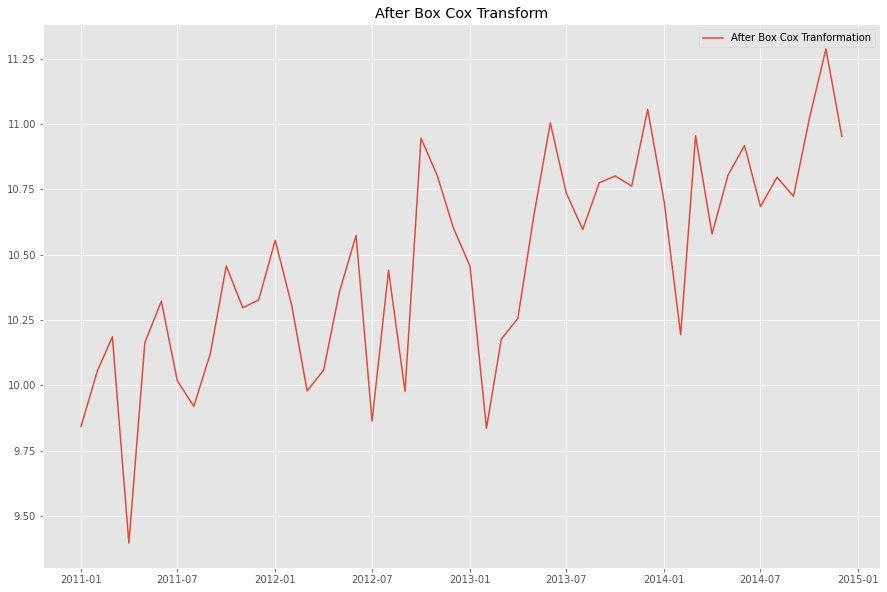

In [49]:
plt.figure(figsize=[15,10])
plt.plot(data_boxcox, label='After Box Cox Tranformation')
plt.legend(loc='best')
plt.title('After Box Cox Transform')
plt.show()

### Differencing:

It is also a powerful technic where we subtract the time series values with consecutive values plotted, It helps to remove trend in data by making the mean constant

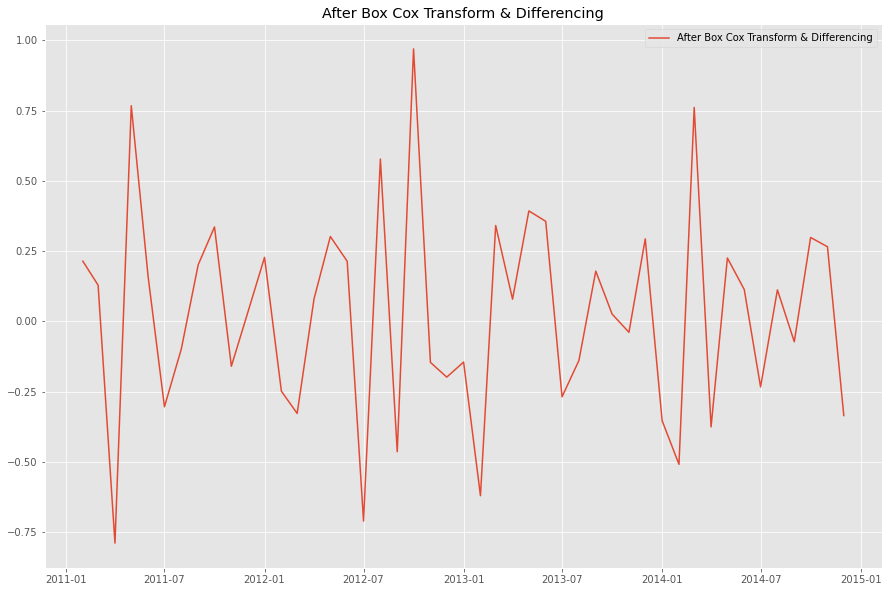

In [50]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_final.index)
plt.figure(figsize=[15,10])
plt.plot(data_boxcox_diff, label='After Box Cox Transform & Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transform & Differencing')
plt.show()

### Performing Train-Test Split for stationery data

In [51]:
# Train test split for ARIMA Models as differencing is done by model it self
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [52]:
# Train test split for Rest Auto-Regressive models which needs differenced data
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto-Regressive Model Building:

### 1) Simple AR Model

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const     0.021143
ar.L1    -0.412285
sigma2    0.126716
dtype: float64


In [54]:
# Re-Transforming the results back to it's original form, For differencing we do Cumilative sum & For Box cox transformation we do exponenting
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

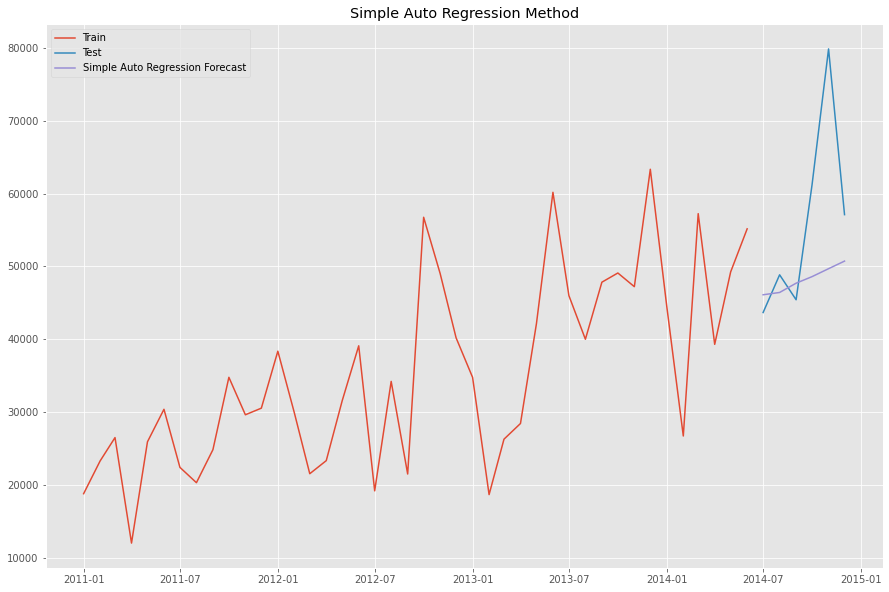

In [55]:
plt.figure(figsize=[15,10])
plt.plot(df_final[:train_len]['Sales'], label='Train')
plt.plot(df_final[train_len:]['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Simple Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Simple Auto Regression Method')
plt.show()

In [56]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(AR) Simple Auto Regression Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17
0,(AR) Simple Auto Regression Method,13698.16,14.18


### 2) MA Model

In [57]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.021125
ma.L1    -0.999737
sigma2    0.081210
dtype: float64


c:\users\umang\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
# Re-Transforming the results back to it's original form, For differencing we do Cumilative sum & For Box cox transformation we do exponenting
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

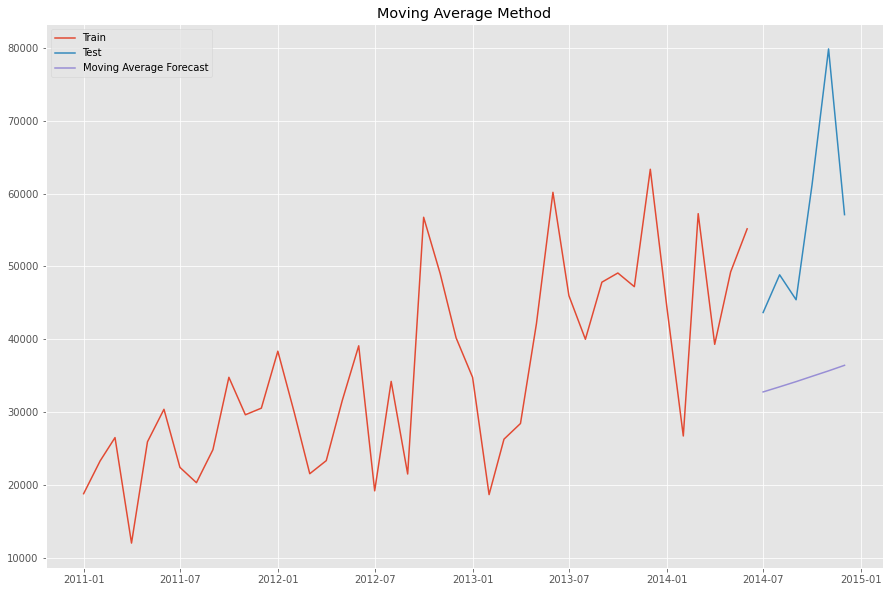

In [59]:
plt.figure(figsize=[15,10])
plt.plot(df_final[:train_len]['Sales'], label='Train')
plt.plot(df_final[train_len:]['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [60]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(MA) Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17
0,(AR) Simple Auto Regression Method,13698.16,14.18
0,(MA) Moving Average Method,24323.53,35.93


### 3) ARMA Model

In [61]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.021159
ar.L1     0.075123
ma.L1    -0.999949
sigma2    0.081038
dtype: float64


In [62]:
# Re-Transforming the results back to it's original form, For differencing we do Cumilative sum & For Box cox transformation we do exponenting
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

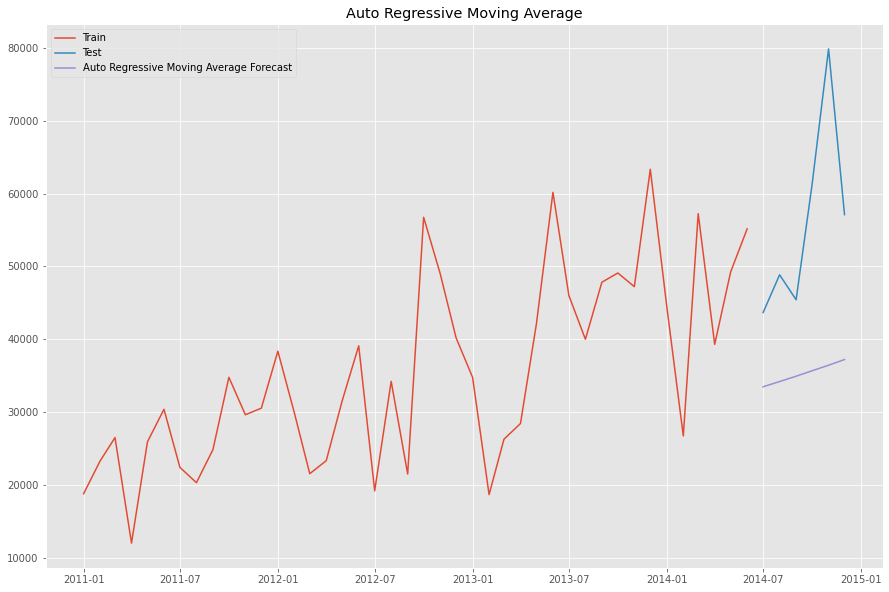

In [63]:
plt.figure(figsize=[15,10])
plt.plot(df_final[:train_len]['Sales'], label='Train')
plt.plot(df_final[train_len:]['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto Regressive Moving Average Forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average')
plt.show()

In [64]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(ARMA) Auto Regressive Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17
0,(AR) Simple Auto Regression Method,13698.16,14.18
0,(MA) Moving Average Method,24323.53,35.93
0,(ARMA) Auto Regressive Moving Average Method,23656.88,34.54


### 4) ARIMA Model

In [65]:
!pip install pmdarima

You should consider upgrading via the 'c:\users\umang\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [66]:
from pmdarima.arima import auto_arima
arima_model=auto_arima(df_final[:train_len]['Sales'], start_p=1, d=1, start_q=1, max_p=5, max_d=5, max_q=5, 
                       error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=888.087, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=895.153, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=891.130, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=893.365, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=888.710, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=890.522, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=890.777, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=885.289, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=884.031, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=885.153, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=889.620, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=887.130, Time=0.0

### From the above inferences we can determine that best ARIMA model is ARIMA(0,1,1) and not the standard ARIMA(1,1,1) with p/d/q = 1

In [67]:
# Let's use the above best model for forecasting
arima_prediction = pd.DataFrame(arima_model.predict(n_periods=6), index=test_data_boxcox.index)
arima_prediction.columns = ['ARIMA_forecast']
arima_prediction

,ARIMA_forecast
Order Date,
2014-07-01,48510.824973
2014-08-01,48510.824973
2014-09-01,48510.824973
2014-10-01,48510.824973
2014-11-01,48510.824973
2014-12-01,48510.824973


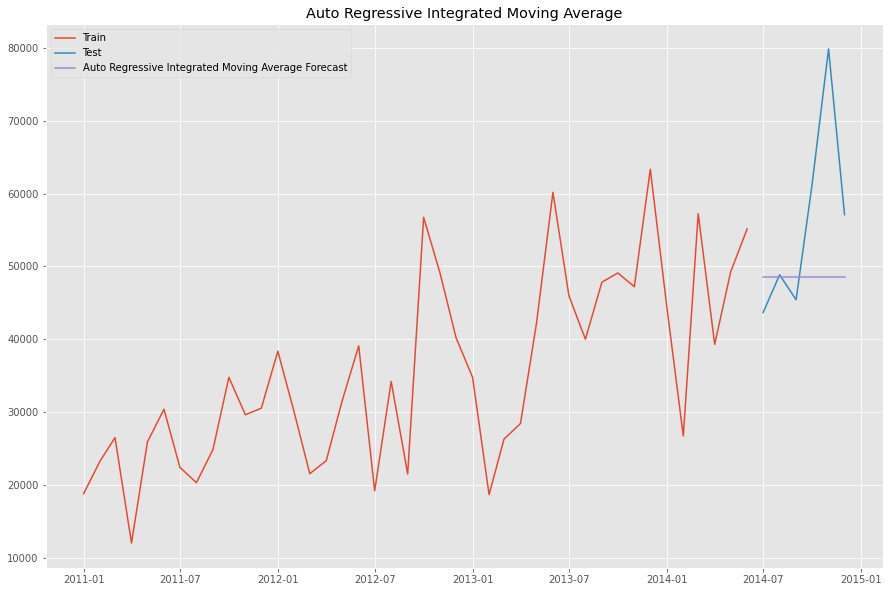

In [68]:
plt.figure(figsize=[15,10])
plt.plot(df_final[:train_len]['Sales'], label='Train')
plt.plot(df_final[train_len:]['Sales'], label='Test')
plt.plot(arima_prediction['ARIMA_forecast'][test.index.min():], label='Auto Regressive Integrated Moving Average Forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average')
plt.show()

In [69]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(df_final[train_len:]['Sales'], arima_prediction['ARIMA_forecast'])).round(2)
mape = np.round(np.mean(np.abs(df_final[train_len:]['Sales']-arima_prediction['ARIMA_forecast'])/df_final[train_len:]['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['ARIMA Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17
0,(AR) Simple Auto Regression Method,13698.16,14.18
0,(MA) Moving Average Method,24323.53,35.93
0,(ARMA) Auto Regressive Moving Average Method,23656.88,34.54


### 5) SARIMA Model

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041369
ma.L1      -0.997166
ar.S.L12    0.100143
ma.S.L12   -0.972348
sigma2      0.058208
dtype: float64


In [71]:
# Re-Transforming the results back to it's original form For Box cox transformation we do exponenting
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

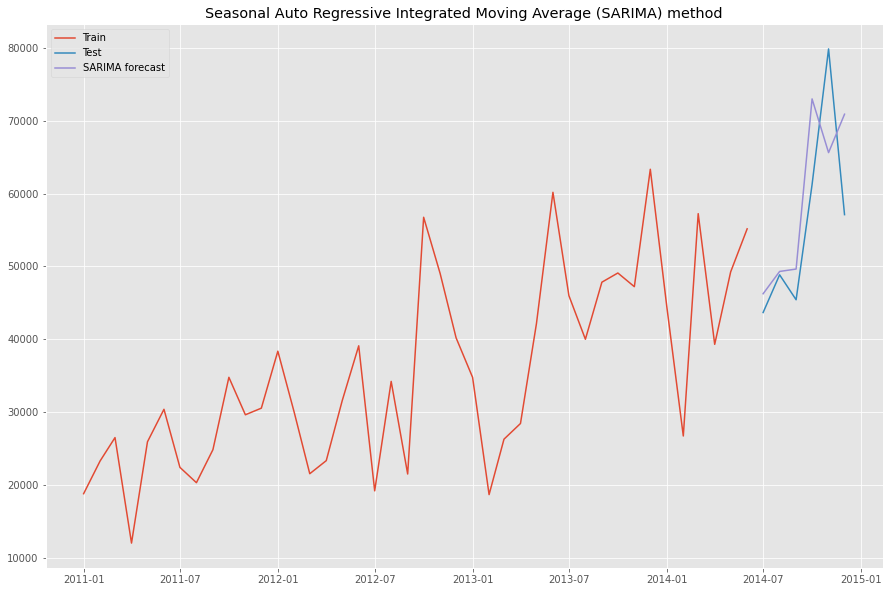

In [72]:
plt.figure(figsize=[15,10])
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average (SARIMA) method')
plt.show()

In [73]:
#Computing RMSE & MAPE Scores
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,12355.97,17.47
0,Simple Average Method,24146.06,34.34
0,Simple Moving Average Method,12903.21,16.54
0,Simple Exponential Smoothing Method,14627.34,15.74
0,Holt's Exponential Smoothing Method,11523.07,15.17
0,Holt Winter's Additive Method,10624.26,13.02
0,Holt Winter's Multiplicative Method,10931.27,17.17
0,(AR) Simple Auto Regression Method,13698.16,14.18
0,(MA) Moving Average Method,24323.53,35.93
0,(ARMA) Auto Regressive Moving Average Method,23656.88,34.54


## Conclusions & Recommendations:

1. The Most Profitable segment is __'APAC_Consumer'__ i.e. APAC region with Consumer segment, as it's CoV(Coefficient of Variance) is lowest with highest stability, The Profits & Sales are also the highest for APAC_Consumer segment making it a cherry on top.
2. When checked decomposition plots we can infer that there is a uptrend existing , there is also certain level of seasonality existing.
3. __Non Regressive Models__: From all the above methods stated in results table, right from NAIVE method upto Advanced Smoothing methods like Holt & Holt winter's method we can infer that Holt Winter's method(additive) is said to perform much better interms of forecasting sales with accuracy of approximately 87%, although additive method is predicting more accurately the multiplicative method is able to capture the seasonal peaks much accurately.
4. __Regressive Models__: From all the above methods stated in results table, right from Simple AR method to ARIMA & SARIMA method we can infer that ARIMA & SARIMA methods were able to predict much better in terms of accuracy, as ARIMA's accuracy stands at 84.4%, SARIMA is much better at 87.12%.
5. Finally, Given the fact based on our decomposition analysis we know that the data consists Trend & Seasonality , considering this as a evidence we can confidently state that Holt Winter's Method & SARIMA method are best forecasting pathways for our sales data prediction.